<a href="https://colab.research.google.com/github/nyoons/ESAA/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

train=pd.read_csv('/content/drive/MyDrive/ESAA OB 3조/방학 프로젝트/train.csv')
test=pd.read_csv('/content/drive/MyDrive/ESAA OB 3조/방학 프로젝트/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/ESAA OB 3조/방학 프로젝트/sample_submission.csv')

In [5]:
train.head()

,ID,문장,유형,극성,시제,확실성,label
0,TRAIN_00000,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
1,TRAIN_00001,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
2,TRAIN_00002,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,사실형,긍정,미래,확실,사실형-긍정-미래-확실
3,TRAIN_00003,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
4,TRAIN_00004,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실


In [6]:
test.head()

,ID,문장
0,TEST_0000,"장욱진의 ＇가족＇은 허물 없는 가족애를, 처음 공개되는 정약용의 ＇정효자전＇과 ＇정..."
1,TEST_0001,"조지 W 부시, 버락 오바마 전 대통령도 전쟁 위험 때문에 버린 카드다."
2,TEST_0002,지난해 1분기 128억원이었던 영업이익이 올해 1분기 505억원으로 급증했다.
3,TEST_0003,수상 작가와 맺으려던 계약서 내용 가운데 일부가 ＇독소 조항＇으로 해석돼 수정을 요...
4,TEST_0004,결국 최근 KDB산업은행은 대규모 손실 위기에 닥친 에어부산에 140억원 금융지원을...


In [7]:
train['유형'].value_counts( )

사실형    13558
추론형     2151
대화형      575
예측형      257
Name: 유형, dtype: int64

In [8]:
train['극성'].value_counts( )

긍정    15793
부정      565
미정      183
Name: 극성, dtype: int64

In [9]:
train['시제'].value_counts( )

과거    8032
현재    6866
미래    1643
Name: 시제, dtype: int64

In [10]:
train['확실성'].value_counts( )

확실     15192
불확실     1349
Name: 확실성, dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16541 entries, 0 to 16540
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      16541 non-null  object
 1   문장      16541 non-null  object
 2   유형      16541 non-null  object
 3   극성      16541 non-null  object
 4   시제      16541 non-null  object
 5   확실성     16541 non-null  object
 6   label   16541 non-null  object
dtypes: object(7)
memory usage: 904.7+ KB


In [12]:
import re

# 정규 표현식으로 숫자를 공백으로 변경 (정규 표현식에서 \d는 숫자를 의미)
train["문장"] = train["문장"].apply(lambda x: re.sub(r"\d+", " ", x))
test["문장"] = test["문장"].apply(lambda x: re.sub(r"\d+", " ", x))

# id 컬럼 제거
train.drop("ID", axis=1, inplace=True)
test.drop("ID", axis=1, inplace=True)

In [13]:
train.head()

,문장,유형,극성,시제,확실성,label
0,. %포인트 금리 인상은 년 이후 년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
1,이어 ＂앞으로 전문가들과 함께 주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
2,정부가 고유가 대응을 위해 월부터 연말까지 유류세 인하 폭을 %에서 %까지 확...,사실형,긍정,미래,확실,사실형-긍정-미래-확실
3,"서울시는 올해 월 즉시 견인 유예시간 분을 제공하겠다고 밝혔지만, 하루 만에 차...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
4,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실


# 시각화

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='count', ylabel='label'>

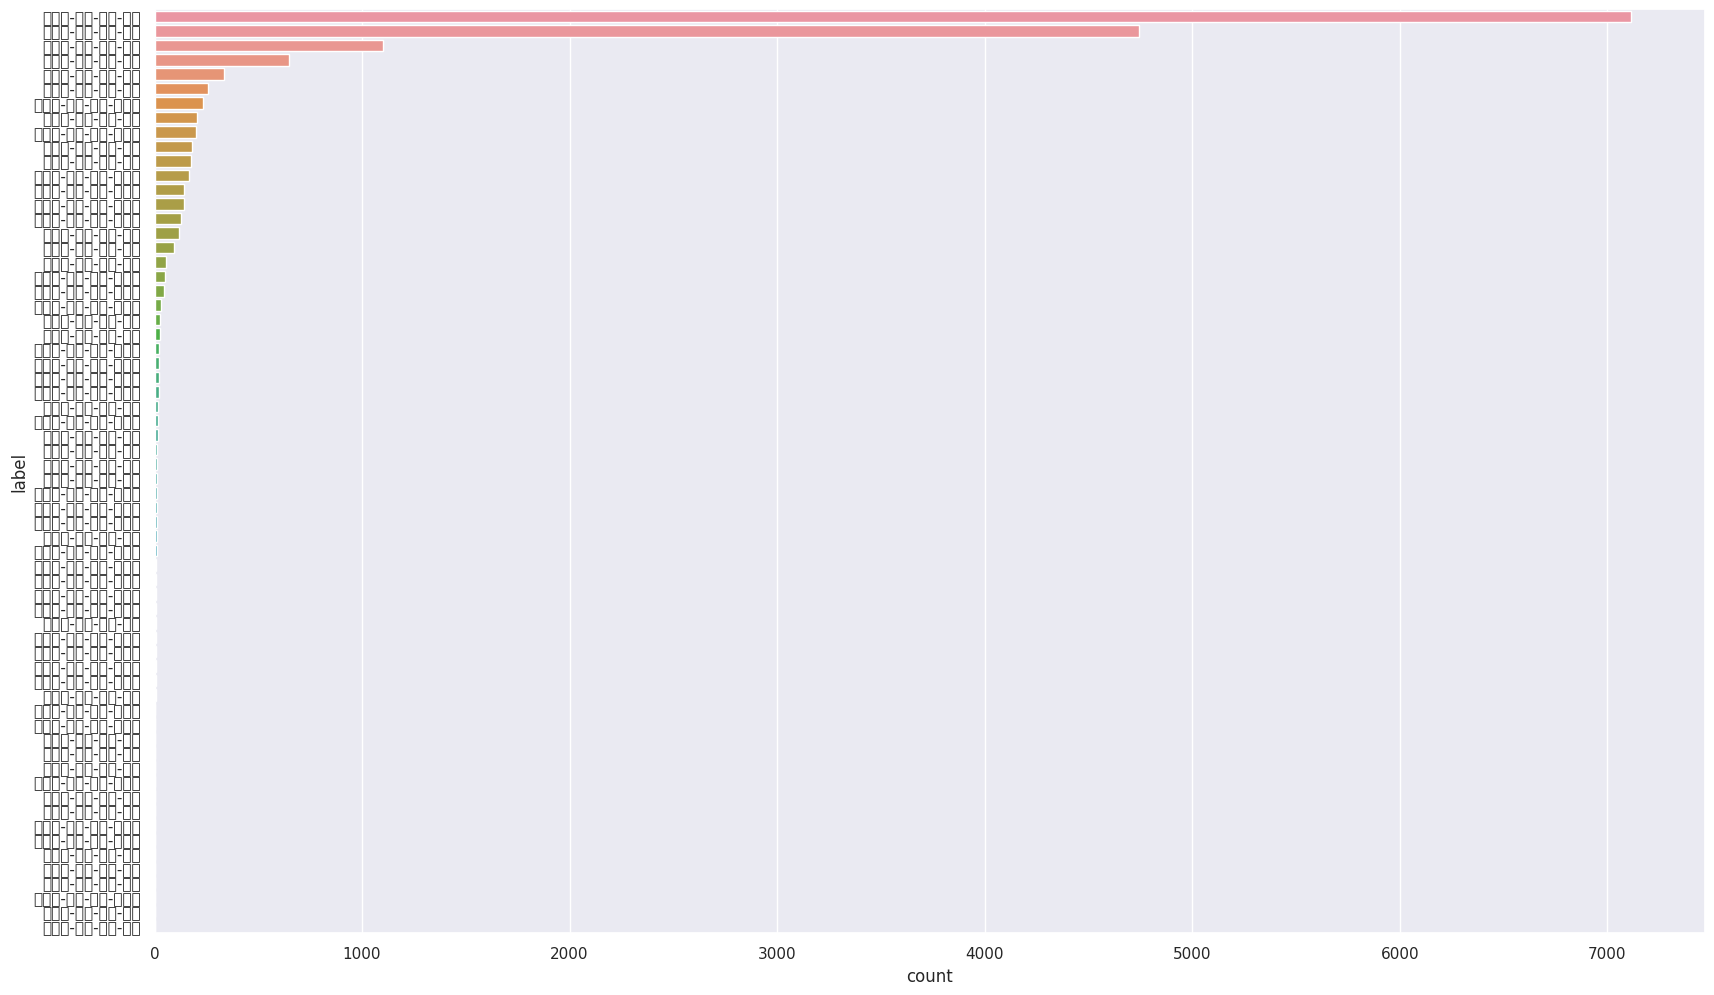

In [21]:
sns.set(rc = {'figure.figsize':(20,12)})
sns.countplot(y="label", data=train,order = train['label'].value_counts().index)

Text(0.5, 1.0, 'Distribution of certainty')

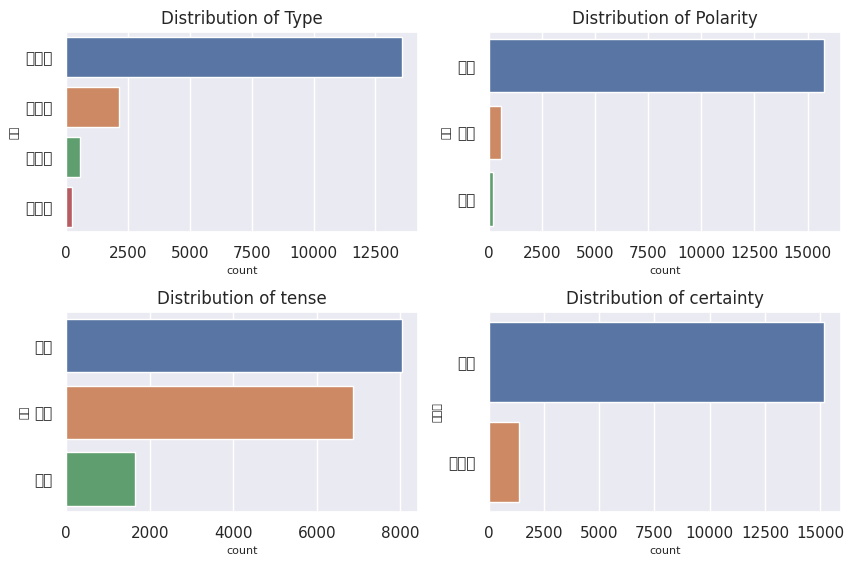

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.4)

g = sns.countplot(y="유형", data=train,order = train['유형'].value_counts().index , ax = axes[0][0])
axes[0][0].set_xlabel(g.get_xlabel(), fontsize=8)
axes[0][0].set_ylabel(g.get_ylabel(), fontsize=8)
axes[0][0].set_title('Distribution of Type')

g = sns.countplot(y="극성", data=train,order = train['극성'].value_counts().index , ax = axes[0][1])
axes[0][1].set_xlabel(g.get_xlabel(), fontsize=8)
axes[0][1].set_ylabel(g.get_ylabel(), fontsize=8)
axes[0][1].set_title('Distribution of Polarity')

g = sns.countplot(y="시제", data=train,order = train['시제'].value_counts().index , ax = axes[1][0])
axes[1][0].set_xlabel(g.get_xlabel(), fontsize=8)
axes[1][0].set_ylabel(g.get_ylabel(), fontsize=8)
axes[1][0].set_title('Distribution of tense')

g = sns.countplot(y="확실성", data=train,order = train['확실성'].value_counts().index , ax = axes[1][1])
axes[1][1].set_xlabel(g.get_xlabel(), fontsize=8)
axes[1][1].set_ylabel(g.get_ylabel(), fontsize=8)
axes[1][1].set_title('Distribution of certainty')

#전처리 및 모델링

## 1. 각각 예측하기

In [14]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 44.9 MB/s eta 0:00:00


In [15]:
from konlpy.tag import Okt
okt=Okt()
def tw_tokenizer(text):
  tokens_ko=okt.morphs(text)
  return tokens_ko

In [16]:
from sklearn.model_selection import train_test_split
x_data=train['문장']
y_data=train['label']
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [17]:
y_train=y_train.reset_index()['label']
y_test=y_test.reset_index()['label']

In [18]:
y_train_a=y_train.copy()
y_train_b=y_train.copy()
y_train_c=y_train.copy()
y_train_d=y_train.copy()

y_test_a=y_test.copy()
y_test_b=y_test.copy()
y_test_c=y_test.copy()
y_test_d=y_test.copy()

In [23]:
for i in range(len(y_train)):
  y_train_a[i]=y_train[i][:3]
  y_train_b[i]=y_train[i][4:6]
  y_train_c[i]=y_train[i][7:9]
  y_train_d[i]=y_train[i][10:]

for i in range(len(y_test)):
  y_test_a[i]=y_test[i][:3]
  y_test_b[i]=y_test[i][4:6]
  y_test_c[i]=y_test[i][7:9]
  y_test_d[i]=y_test[i][10:]

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

tfidf_vect=TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(x_train)
tfidf_matrix_train=tfidf_vect.transform(x_train)

유형

In [25]:
from sklearn.ensemble import RandomForestClassifier
#랜덤포레스트를 이용해 분류 수행
rf_clf=RandomForestClassifier(random_state=0)

#GridSearchCV
params={'max_depth': [6,8,10,12],
        'min_samples_leaf':[8,12,18],
        'min_samples_split':[8,16,20]}

grid_cv=GridSearchCV(rf_clf, param_grid=params, cv=3, scoring='f1_weighted', verbose=1)
grid_cv.fit(tfidf_matrix_train, y_train_a)
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8} 0.7398


In [26]:
from sklearn.metrics import f1_score

tfidf_matrix_test=tfidf_vect.transform(x_test)

best_estimator=grid_cv.best_estimator_
preds_a_rf=best_estimator.predict(tfidf_matrix_test)

print('randomforest f1:', f1_score(y_test_a, preds_a_rf,average='weighted'))

randomforest f1: 0.7328398440439443


In [48]:
from sklearn.ensemble import GradientBoostingClassifier
#gbm 이용해 분류 수행
gb_clf=GradientBoostingClassifier(random_state=0)

#GridSearchCV
params={'n_estimators': [100,500],
        'learning_rate':[0.05,0.1]}

grid_cv=GridSearchCV(gb_clf, param_grid=params, cv=3, scoring='f1_weighted', verbose=1)
grid_cv.fit(tfidf_matrix_train, y_train_a)
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'learning_rate': 0.1, 'n_estimators': 500} 0.8183


In [49]:
best_estimator=grid_cv.best_estimator_
preds_a_gb=best_estimator.predict(tfidf_matrix_test)

print('gbm f1:', f1_score(y_test_a, preds_a_gb,average='weighted'))

gbm f1: 0.8292618960418151


In [50]:
preds_a=preds_a_gb

극성

In [30]:
from sklearn.ensemble import RandomForestClassifier
#랜덤포레스트를 이용해 분류 수행
rf_clf=RandomForestClassifier(random_state=0)

#GridSearchCV
params={'max_depth': [6,8,10,12],
        'min_samples_leaf':[8,12,18],
        'min_samples_split':[8,16,20]}

grid_cv=GridSearchCV(rf_clf, param_grid=params, cv=3, scoring='f1_weighted', verbose=1)
grid_cv.fit(tfidf_matrix_train, y_train_b)
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8} 0.9331


In [31]:
best_estimator=grid_cv.best_estimator_
preds_b_rf=best_estimator.predict(tfidf_matrix_test)

print('randomforest f1:', f1_score(y_test_b, preds_b_rf,average='weighted'))

randomforest f1: 0.9311908252750882


In [32]:
from sklearn.ensemble import GradientBoostingClassifier
#gbm 이용해 분류 수행
gb_clf=GradientBoostingClassifier(random_state=0)

#GridSearchCV
params={'n_estimators': [100,500],
        'learning_rate':[0.05,0.1]}

grid_cv=GridSearchCV(gb_clf, param_grid=params, cv=3, scoring='f1_weighted', verbose=1)
grid_cv.fit(tfidf_matrix_train, y_train_b)
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'learning_rate': 0.05, 'n_estimators': 500} 0.9602


In [33]:
best_estimator=grid_cv.best_estimator_
preds_b_gb=best_estimator.predict(tfidf_matrix_test)

print('gbm f1:', f1_score(y_test_b, preds_b_gb,average='weighted'))

gbm f1: 0.9664900083800605


In [34]:
preds_b=preds_b_gb

시제

In [35]:
from sklearn.ensemble import RandomForestClassifier
#랜덤포레스트를 이용해 분류 수행
rf_clf=RandomForestClassifier(random_state=0)

#GridSearchCV
params={'max_depth': [6,8,10,12],
        'min_samples_leaf':[8,12,18],
        'min_samples_split':[8,16,20]}

grid_cv=GridSearchCV(rf_clf, param_grid=params, cv=3, scoring='f1_weighted', verbose=1)
grid_cv.fit(tfidf_matrix_train, y_train_c)
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8} 0.6835


In [36]:
best_estimator=grid_cv.best_estimator_
preds_c_rf=best_estimator.predict(tfidf_matrix_test)

print('randomforest f1:', f1_score(y_test_c, preds_c_rf,average='weighted'))

randomforest f1: 0.6976471426088767


In [37]:
from sklearn.ensemble import GradientBoostingClassifier
#gbm 이용해 분류 수행
gb_clf=GradientBoostingClassifier(random_state=0)

#GridSearchCV
params={'n_estimators': [100,500],
        'learning_rate':[0.05,0.1]}

grid_cv=GridSearchCV(gb_clf, param_grid=params, cv=3, scoring='f1_weighted', verbose=1)
grid_cv.fit(tfidf_matrix_train, y_train_c)
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'learning_rate': 0.1, 'n_estimators': 500} 0.8245


In [38]:
best_estimator=grid_cv.best_estimator_
preds_c_gb=best_estimator.predict(tfidf_matrix_test)

print('gbm f1:', f1_score(y_test_c, preds_c_gb,average='weighted'))

gbm f1: 0.8398555281597593


In [39]:
preds_c=preds_c_gb

확실성

In [40]:
#로지스틱 회귀를 이용해 분류 수행
lg_clf=LogisticRegression(random_state=0)

#파라미터 C의 최적화를 위해 GridSearchCV 이용
params={'C':[1,3.5,5,10]}

grid_cv=GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='f1_weighted', verbose=1)
grid_cv.fit(tfidf_matrix_train, y_train_d)
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'C': 10} 0.9006


In [41]:
best_estimator=grid_cv.best_estimator_
preds_d_lg=best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression f1:', f1_score(y_test_d, preds_d_lg,average='weighted'))

Logistic Regression f1: 0.9043053214641379


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
#gbm 이용해 분류 수행
gb_clf=GradientBoostingClassifier(random_state=0)

#GridSearchCV
params={'n_estimators': [100,500],
        'learning_rate':[0.05,0.1]}

grid_cv=GridSearchCV(gb_clf, param_grid=params, cv=3, scoring='f1_weighted', verbose=1)
grid_cv.fit(tfidf_matrix_train, y_train_d)
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'learning_rate': 0.05, 'n_estimators': 500} 0.9023


In [43]:
best_estimator=grid_cv.best_estimator_
preds_d_gb=best_estimator.predict(tfidf_matrix_test)

print('gbm f1:', f1_score(y_test_d,preds_d_gb,average='weighted'))

gbm f1: 0.9043053214641379


In [44]:
preds_d=preds_d_lg

합치기

In [51]:
pred=preds_a+"-"+preds_b+"-"+preds_c+"-"+preds_d

In [52]:
pred

array(['사실형-긍정-현재-확실', '사실형-긍정-현재-확실', '사실형-긍정-현재-확실', ...,
       '사실형-긍정-과거-확실', '사실형-긍정-과거-확실', '사실형-긍정-현재-확실'], dtype=object)

In [53]:
y_test

0       추론형-긍정-과거-불확실
1        사실형-긍정-과거-확실
2        사실형-긍정-미래-확실
3        사실형-긍정-과거-확실
4        사실형-미정-미래-확실
            ...      
3304     사실형-긍정-현재-확실
3305     사실형-긍정-과거-확실
3306     사실형-긍정-미래-확실
3307     사실형-긍정-과거-확실
3308     사실형-긍정-현재-확실
Name: label, Length: 3309, dtype: object

In [54]:
f1_score(y_test, pred,average='weighted')

0.6474480466425176

제출

In [55]:
tfidf_vect=TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(x_train)
tfidf_matrix_train=tfidf_vect.transform(x_train)
tfidf_matrix_test=tfidf_vect.transform(test['문장'])

KeyboardInterrupt: ignored

In [ ]:
a_clf=GradientBoostingClassifier(random_state=0, n_estimators=500, learning_rate=0.1 )
a_clf.fit(tfidf_matrix_train, y_train_a)
pred_a=a_clf.predict(tfidf_matrix_test)

In [ ]:
b_clf=GradientBoostingClassifier(random_state=0, learning_rate=0.05, n_estimators=500)
b_clf.fit(tfidf_matrix_train, y_train_b)
pred_b=b_clf.predict(tfidf_matrix_test)

In [ ]:
c_clf=GradientBoostingClassifier(random_state=0, learning_rate=0.1, n_estimators=500)
c_clf.fit(tfidf_matrix_train, y_train_c)
pred_c=c_clf.predict(tfidf_matrix_test)

In [ ]:
d_clf=LogisticRegression(random_state=0,C=10)
d_clf.fit(tfidf_matrix_train, y_train_d)
pred_d=d_clf.predict(tfidf_matrix_test)

In [ ]:
pred=pred_a+"-"+pred_b+"-"+pred_c+"-"+pred_d

In [ ]:
submission['label'] = pred

In [ ]:
submission

In [ ]:
submission.to_csv('/content/drive/MyDrive/open/sample_submission.csv', index=False)

# 한번에 예측하기

In [56]:
import re
import string
def clean_text(text):

    text=text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text=re.sub('[^가-힣a-z]', ' ', text)

    return text

train['문장']=train['문장'].apply(lambda x :clean_text(x))
test['문장']=test['문장'].apply(lambda x :clean_text(x))

train['문장'].head()

0                          포인트 금리 인상은  년 이후  년 만에 처음이다
1    이어  앞으로 전문가들과 함께  주 단위로 상황을 재평가할 예정 이라며  그 이전이...
2      정부가 고유가 대응을 위해  월부터 연말까지 유류세 인하 폭을  에서  까지 확대한다
3    서울시는 올해  월 즉시 견인 유예시간  분을 제공하겠다고 밝혔지만 하루 만에 차도...
4              익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다
Name: 문장, dtype: object

In [57]:
from konlpy.tag import Okt

okt = Okt()
def tw_tokenizer(text):
  #입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko=okt.morphs(text)
  return tokens_ko

###문장과 label로 예측 시

In [58]:
X = train['문장']
y = train['label']
from sklearn.model_selection import train_test_split

# 제공된 학습데이터를 학습 / 검증 데이터셋으로 재 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#twitter 객체의 morphs() 객체를 이용한 tokenizer 사용. ngram_range=(1,2)
stopwords=['을', '를', '이', '가', '은', '는', ',', '"']
tfidf_vect=TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9, stop_words=stopwords)
tfidf_vect.fit(X_train)
tfidf_matrix_train=tfidf_vect.transform(X_train)

로지스틱 회귀

In [60]:
#로지스틱 회귀를 이용해 분류 수행
lg_clf=LogisticRegression(random_state=0)

#파라미터 최적화를 위해 GridSearchCV 이용
params={'penalty':['l2','l1'],
        'C':[1, 3.5, 5.5, 10]}

grid_cv=GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='f1_weighted', verbose=1)
grid_cv.fit(tfidf_matrix_train, y_train)
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'C': 10, 'penalty': 'l2'} 0.6


In [61]:
#학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환.
tfidf_matrix_test=tfidf_vect.transform(X_test)

#classifier는 gridsearchcv에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator=grid_cv.best_estimator_
lg_y_pred=best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression f1-score:', f1_score(y_test, lg_y_pred, average='weighted'))

Logistic Regression f1-score: 0.6185289306448688


랜덤 포레스트

In [ ]:
# 랜덤 포레스트를 이용해 분류 수행
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=0)

#파라미터 최적화를 위해 GridSearchCV 이용
params={'n_estimators' : [10, 100],
        'max_depth' : [6, 8, 10, 12]
        }

grid_cv=GridSearchCV(rf_clf, param_grid=params, cv=3, scoring='f1_weighted', verbose=1)
grid_cv.fit(tfidf_matrix_train, y_train)
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

In [ ]:
#학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환.
tfidf_matrix_test=tfidf_vect.transform(X_test)

#classifier는 gridsearchcv에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator=grid_cv.best_estimator_
rf_y_pred=best_estimator.predict(tfidf_matrix_test)

print('Random Forest f1-score:', f1_score(y_test, rf_y_pred, average='weighted'))

결정 트리

In [ ]:
# 결정 트리를 이용해 분류 수행
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=0)

#파라미터 최적화를 위해 GridSearchCV 이용
params={'max_depth' : [6, 8, 10, 12],
        'min_samples_split' : [8, 16, 20]
        }

grid_cv=GridSearchCV(dt_clf, param_grid=params, cv=3, scoring='f1_weighted', verbose=1)
grid_cv.fit(tfidf_matrix_train, y_train)
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

In [ ]:
#학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환.
tfidf_matrix_test=tfidf_vect.transform(X_test)

#classifier는 gridsearchcv에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator=grid_cv.best_estimator_
dt_y_pred=best_estimator.predict(tfidf_matrix_test)

print('Decision Tree f1-score:', f1_score(y_test, dt_y_pred, average='weighted'))

그래디언트 부스팅

In [ ]:
# 그레디언트 부스팅을 이용해 분류 수행
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(random_state=0)

#파라미터 최적화를 위해 GridSearchCV 이용
params={'n_estimators': [100,500],
        'learning_rate':[0.05,0.1]}

grid_cv=GridSearchCV(gb_clf, param_grid=params, cv=3, scoring='f1_weighted', verbose=1)
grid_cv.fit(tfidf_matrix_train, y_train)
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

In [ ]:
#학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환.
tfidf_matrix_test=tfidf_vect.transform(X_test)

#classifier는 gridsearchcv에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator=grid_cv.best_estimator_
gb_y_pred=best_estimator.predict(tfidf_matrix_test)

print('Gradient Boosting f1-score:', f1_score(y_test, gb_y_pred, average='weighted'))

In [62]:
submission['label'] = lg_y_pred

ValueError: ignored

In [ ]:
submission